### Data Analysis Practice : Titanic Dataset

#### Data preprocessing

- Handle NaN / Null
- Remove unnecessary variables
- Consider encoding
- Data scaling
- Remove the outlier
- Feature selection, extraction, engineering
- Data split (training / test)

#### Model construction and evaluation

- Decision Tree, Random Forest, Logistic Regression
- K fold cross validation
- hyper parameter tuning

##### Data load

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print('data information')
print('-'*50)
data.info()
print('-'*50)
print('data size: ',data.shape)

data information
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
data size:  (891, 12)


We know that
> We may need to encoding Name, Sex, Ticket, Cabin and Embarked.  
> We guess that Age, Cabin, Embarked have NaN / null values.

##### Check NaN

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
D              3
              ..
B79            1
C30            1
C104           1
A24            1
D28            1
Name: Cabin, Length: 147, dtype: int64

In [5]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
data['Age'].fillna(np.mean(data['Age']),inplace = True)
data['Cabin'].fillna('N',inplace = True)
data['Embarked'].fillna('S',inplace = True)

In [7]:
data.isna().sum().sum()

0

In [8]:
data['Cabin'] = data['Cabin'].str[:1]
data['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

##### EDA

In [9]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

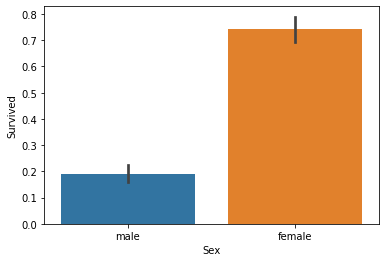

In [10]:
sns.barplot(x = 'Sex', y = 'Survived',data = data)

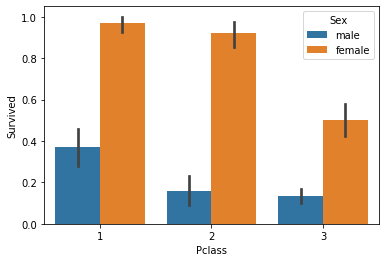

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data)

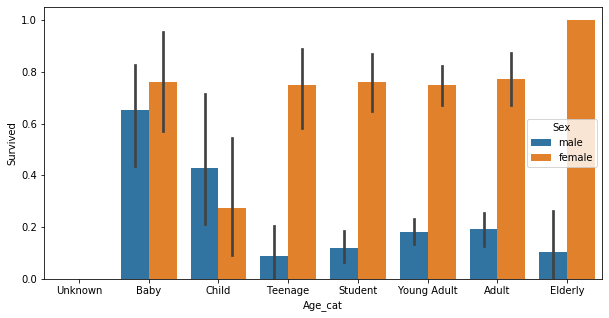

In [12]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenage'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

plt.figure(figsize = (10,5))
groups = ['Unknown','Baby','Child','Teenage','Student','Young Adult','Adult','Elderly']

data['Age_cat'] = data['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = data, order = groups)
data.drop('Age_cat', axis = 1, inplace = True)

##### Label Encoding

In [13]:
from sklearn import preprocessing

def encode_features(data):
    features = ['Cabin','Sex','Embarked']
    for f in features:
        l = preprocessing.LabelEncoder()
        l = l.fit(data[f])
        data[f] = l.transform(data[f])
    return data

data = encode_features(data)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2


In [14]:
data.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [15]:
from sklearn.model_selection import train_test_split

features = data.drop('Survived', axis = 1)
label = data['Survived']

X_train,X_test,y_train,y_test = train_test_split(features,label,test_size = 0.2,random_state = 777)

##### Model construction

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DecT = DecisionTreeClassifier(random_state = 777)
RanF = RandomForestClassifier(random_state = 777)
LogR = LogisticRegression()

DecT.fit(X_train,y_train)
dpred = DecT.predict(X_test)
print('Decision Tree : ',accuracy_score(y_test,dpred))

RanF.fit(X_train,y_train)
rpred = RanF.predict(X_test)
print('Random Forest : ',accuracy_score(y_test,rpred))

LogR.fit(X_train,y_train)
lpred = LogR.predict(X_test)
print('Logistic Regression : ',accuracy_score(y_test,lpred))

Decision Tree :  0.7821229050279329
Random Forest :  0.8044692737430168
Logistic Regression :  0.8044692737430168


C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Model evaluation

In [17]:
## K Fold CV
from sklearn.model_selection import KFold

def multi_Kfold(model,K = 5):
    kfold = KFold(n_splits = K)
    scores = []

    for i,(train_index,test_index) in enumerate(kfold.split(features)):
        X_train,X_test = features.values[train_index], features.values[test_index]
        y_train,y_test = label.values[train_index], label.values[test_index]
        
        model.fit(X_train,y_train)
        prediction  = model.predict(X_test)
        accuracy = accuracy_score(y_test,prediction)
        scores.append(accuracy)
        print('#{0} Cross Validation Acc: {1:.4f}'.format(i+1,accuracy))
        
    print('\n### Mean CV Acc: {0:.4f}'.format(np.mean(scores)))
    return

print('\n')
print('-'*35)
print('* K Fold CV for Decision Tree')
print('-'*35)
multi_Kfold(DecT)
print('-'*35)
print('* K Fold CV for Random Forest')
print('-'*35)
multi_Kfold(RanF)
print('-'*35)
print('* K Fold CV for Logistic Regression')
print('-'*35)
multi_Kfold(LogR)
print('-'*35)
print('\n')



-----------------------------------
* K Fold CV for Decision Tree
-----------------------------------
#1 Cross Validation Acc: 0.7542
#2 Cross Validation Acc: 0.7697
#3 Cross Validation Acc: 0.7865
#4 Cross Validation Acc: 0.7584
#5 Cross Validation Acc: 0.8202

### Mean CV Acc: 0.7778
-----------------------------------
* K Fold CV for Random Forest
-----------------------------------
#1 Cross Validation Acc: 0.7877
#2 Cross Validation Acc: 0.7809
#3 Cross Validation Acc: 0.8483
#4 Cross Validation Acc: 0.7865
#5 Cross Validation Acc: 0.8371

### Mean CV Acc: 0.8081
-----------------------------------
* K Fold CV for Logistic Regression
-----------------------------------
#1 Cross Validation Acc: 0.7933
#2 Cross Validation Acc: 0.7921
#3 Cross Validation Acc: 0.7753
#4 Cross Validation Acc: 0.7472
#5 Cross Validation Acc: 0.8427

### Mean CV Acc: 0.7901
-----------------------------------




C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [18]:
## use cross_val_score function
from sklearn.model_selection import cross_val_score

def multi_cvs(model,cv_val = 5):
    score = cross_val_score(model,features,label,cv = cv_val)
    for i, acc in enumerate(score):
        print('#{0} Cross Validation Acc: {1:.4f}'.format(i+1,acc))
    print('\n### Mean CV Acc: {0:.4f}'.format(np.mean(score)))
    return

print('\n')
print('-'*35)
print('* CV for Decision Tree')
print('-'*35)
multi_cvs(DecT)
print('-'*35)
print('* CV for Random Forest')
print('-'*35)
multi_cvs(RanF)
print('-'*35)
print('* CV for Logistic Regression')
print('-'*35)
multi_cvs(LogR)
print('-'*35)
print('\n')



-----------------------------------
* CV for Decision Tree
-----------------------------------
#1 Cross Validation Acc: 0.7542
#2 Cross Validation Acc: 0.7709
#3 Cross Validation Acc: 0.8034
#4 Cross Validation Acc: 0.7697
#5 Cross Validation Acc: 0.8249

### Mean CV Acc: 0.7846
-----------------------------------
* CV for Random Forest
-----------------------------------
#1 Cross Validation Acc: 0.7542
#2 Cross Validation Acc: 0.7654
#3 Cross Validation Acc: 0.8483
#4 Cross Validation Acc: 0.7865
#5 Cross Validation Acc: 0.8475

### Mean CV Acc: 0.8004
-----------------------------------
* CV for Logistic Regression
-----------------------------------
#1 Cross Validation Acc: 0.7877
#2 Cross Validation Acc: 0.7933
#3 Cross Validation Acc: 0.7753
#4 Cross Validation Acc: 0.7640
#5 Cross Validation Acc: 0.8192

### Mean CV Acc: 0.7879
-----------------------------------




C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\92nor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_f = GridSearchCV(DecT,param_grid = parameters,scoring = 'accuracy',cv=5)
grid_f.fit(X_train,y_train)

print('GridSearchCV optimal parameter :',grid_f.best_params_)
print('GridSearchCV best accuracy: {0:.4f}'.format(grid_f.best_score_))
best_grid = grid_f.best_estimator_

# prediction using grid_f results (estimator)
dpredictions = best_grid.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('DecisionTreeClassifier Acc in Test dataset: {0:.4f}'.format(accuracy))


GridSearchCV optimal parameter : {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
GridSearchCV best accuracy: 0.8132
DecisionTreeClassifier Acc in Test dataset: 0.7821
